## Estadísitica Aplicada
## SERIE DE TIEMPO

Nombres y matriculas:

Néstor Geovanni Aguilar Coronado - 1724807

Cecilia Sarahí Gutiérrez Padilla - 1953437

Adrián Ramírez Aguirre - 1912750

Gabriel Antonio Reyes Mayo - 1958790

Itzel Zavala Acosta - 1964493

Grupo: 43

Equipo: Ekuipo dinamita escuadrón alfa buena onda

In [1]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Librerías especializadas
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
# Configurar el tamaño de las gráficas (largo, alto)
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importamos los datos
datos = pd.read_excel('base_PIA.xlsx',sheet_name='Inflación')

# **1. Introducción.**

La inflación es un fenómeno que se observa en la economía de un país y está relacionado con el aumento desordenado de los precios de la mayor parte de los bienes y servicios que se comercian en sus mercados, por un periodo de tiempo prolongado.

Cuando hay inflación en una economía, es muy difícil distribuir nuestros ingresos, planear un viaje, pagar nuestras deudas o invertir en algo rentable, ya que los precios, que eran una referencia para asignar nuestro dinero de la mejor manera posible, están distorsionados.

Cuando se presenta, nos damos cuenta que la cantidad de dinero que veníamos administrando tiempo atrás, ya no nos alcanza para comprar lo mismo que antes y esto nos afecta a todos: empleados, productores, ahorradores, inversionistas, empresarios, amas de casa, etc. Y sobre todo a los que tienen menos dinero y acceso a los servicios financieros.

Existen varias causas que pueden desencadenar este fenómeno inflacionario. Sin embargo, la principal es generada por los excesos de dinero circulando en manos de la población que, al sentirse con más recursos, incrementa sus gastos generando una mayor demanda de bienes y servicios en la economía cuando la capacidad productiva del país no está en posibilidades de cubrirla, provocando escasez y aumentos en los precios.

Hablarás de la serie de tiempo que te tocó analizar: ¿qué mide? ¿la frecuencia de los datos? ¿se observa alguna tendencia? Y se puede añadir la gráfica de la serie.

In [4]:
# Observaremos los datos que se nos proporcionaron.
datos

,Periodos,Inflación
0,1970/01,5.20
1,1970/02,4.81
2,1970/03,5.01
3,1970/04,4.87
4,1970/05,5.09
...,...,...
640,2023/05,5.84
641,2023/06,5.06
642,2023/07,4.79
643,2023/08,4.64


In [5]:
# Tipo de variables del DataFrame
datos.dtypes

Periodos      object
Inflación    float64
dtype: object

In [6]:
# Verificamos que no haya missing values
datos.isnull().sum()

Periodos     0
Inflación    0
dtype: int64

In [7]:
# Le damos el formato al index

# Le damos el formato de la fecha
datos['Periodos'] = pd.to_datetime(datos['Periodos'], format='%Y/%m') 

# Hacemos que el index sea el tiempo
datos = datos.set_index('Periodos')

# Le asignamos una frecuencia de tiempo
datos = datos.asfreq('MS')

In [8]:
# Comprobamos que se haya efectuado correctamente
datos.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01'],
              dtype='datetime64[ns]', name='Periodos', length=645, freq='MS')

In [9]:
# Periodo total de observación

print('La fecha inicial del periodo de observación es', datos.index[0],', mientras que la fecha final es:', datos.index[-1])

# Total de observaciones de la base de datos
print('El total de observaciones obtenidas en este periodo es de:', datos['Inflación'].count())

La fecha inicial del periodo de observación es 1970-01-01 00:00:00 , mientras que la fecha final es: 2023-09-01 00:00:00
El total de observaciones obtenidas en este periodo es de: 645


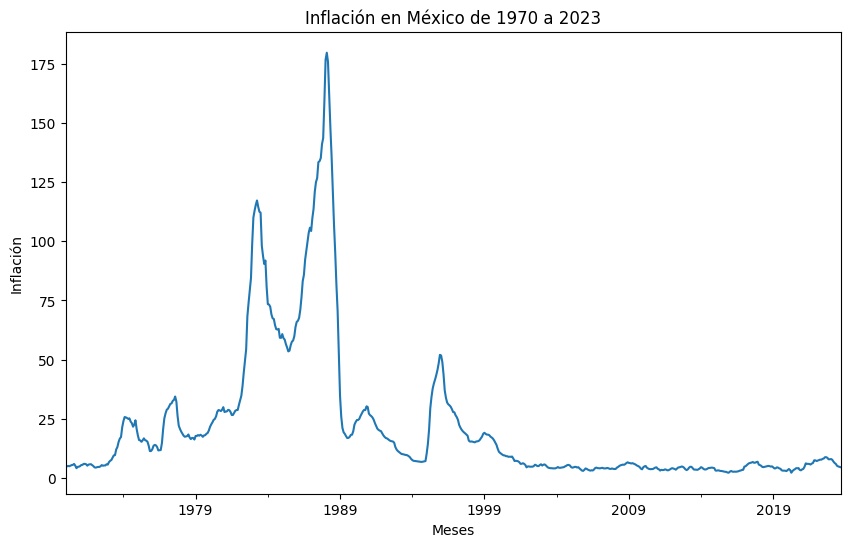

In [10]:
# Graficaremos los datos para observar su comportamiento a lo largo de los años
datos['Inflación'].plot()
plt.title('Inflación en México de 1970 a 2023')
plt.xlabel('Meses')
plt.ylabel('Inflación')
plt.show();

**¿Qué mide?** Este análisis evalúa la variación experimentada por la inflación en México desde 1970 hasta 2023, utilizando un conjunto de 645 observaciones. Estas observaciones proporcionan información valiosa para proyectar los posibles valores futuros de la inflación.

**¿Cuá es la frecuencia de los datos?** Los datos se recopilaron mensualmente, lo que implica que se dispone de información detallada a lo largo de cada mes para realizar un análisis más preciso.

**¿Se observa alguna tendencia?** Determinar una tendencia general a lo largo de todo el período resulta desafiante. Entre 1970 y 1990, la gráfica revela una tendencia alcista, mientras que en el resto del periodo parece prevalecer una tendencia más constante. Este patrón sugiere cambios significativos en la dinámica de la inflación a lo largo del tiempo.

### **2. Comenta acerca de si se observa cierta estacionalidad en la serie, en que meses aumenta la variable ¿por qué?, en que meses disminuye la variable ¿por qué? ¿hay efecto estacional?**

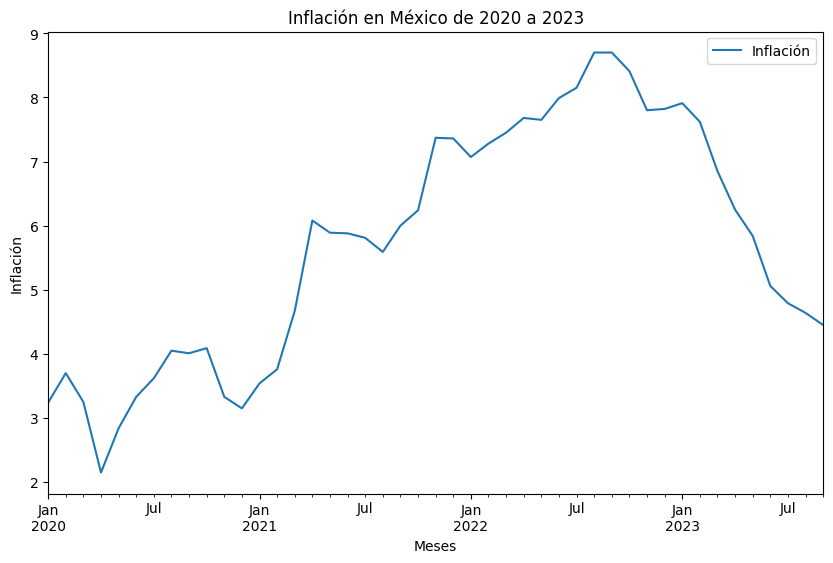

In [11]:
# Graficaremos los datos para observar su comportamiento en los últimos años
datos['2020':'2023'].plot()
plt.title('Inflación en México de 2020 a 2023')
plt.xlabel('Meses')
plt.ylabel('Inflación')
plt.show();

Podemos observar que existe estacionalidad en la serie de inflación en México; notemos como en los meses de junio y julio aumenta la variable, y desciende en los meses de diciembre y enero, al menos en el periodo del 2020 al 2023. Esto se debe a que junio-julio es época de verano, por lo que el aumento del consumo sea probablemente asociado al periodo vacacional, y en diciembre-enero como es temporada de invierno hay menos consumo en comparación con el verano.

### **3. Uno los propósitos fundamentales del análisis de series de tiempo es el pronóstico, es decir, “anticipar valores futuros de la variable”. Comenta para quién es importante conocer el pronóstico de la serie de tiempo que analizaras y por qué es importante conocer el pronóstico de dicha serie de tiempo.**

* La inflación redistribuye el ingreso y el poder adquisitivo de manera desfavorable, por lo tanto la información del pronóstico es de suma importancia para los hogares de las familias en México, ya que la inflación puede considerarse un impuesto regresivo, y que afecta en mayor medida a las familias de menores ingresos, debido a que estos hogares mantienen una mayor proporción de sus recursos en efectivo y cuentan con menores alternativas para proteger su patrimonio de la erosión provocada por la inflación. Además, la inflación también reduce el poder de compra de todo tipo de obligaciones contractuales.

* La inflación también afecta la asignación de recursos en la economía. 

En conclusión, en un ambiente de inflación alta y volátil, las familias y las empresas enfrentan un mayor grado de incertidumbre para la toma de decisiones, entonces, gracias a la estimación de cómo será el comportamiento de la inflación en México, podrá ayudar a la toma decisiones con respecto a propiciar una asignación eficiente de los recursos, y además de evitar una distorsión de los patrones de gasto, lo cual afecta la productividad en la economía.

### **4. Añade las estadísticas descriptivas de la serie de tiempo**,


In [12]:
datos.describe()

,Inflación
count,645.000000
mean,21.657705
std,30.416820
min,2.130000
25%,4.510000
50%,8.410000
75%,24.430000
max,179.730000


La inflación mínima que ha tenido México desde 1970 hasta el 2023 es de 2.13%,\
mientras que la inflación máxima que ha tenido México desde 1970 es de 179.73%.

Si se tuviera que generalizar cuál es la inflación que tiene México a lo largo de el periodo de estudio, se podría decir que en promedio el país tiene una inflación de 21.66%.

### **5. Para ver mejor el comportamiento de la variable aplica un promedio móvil centrado.**

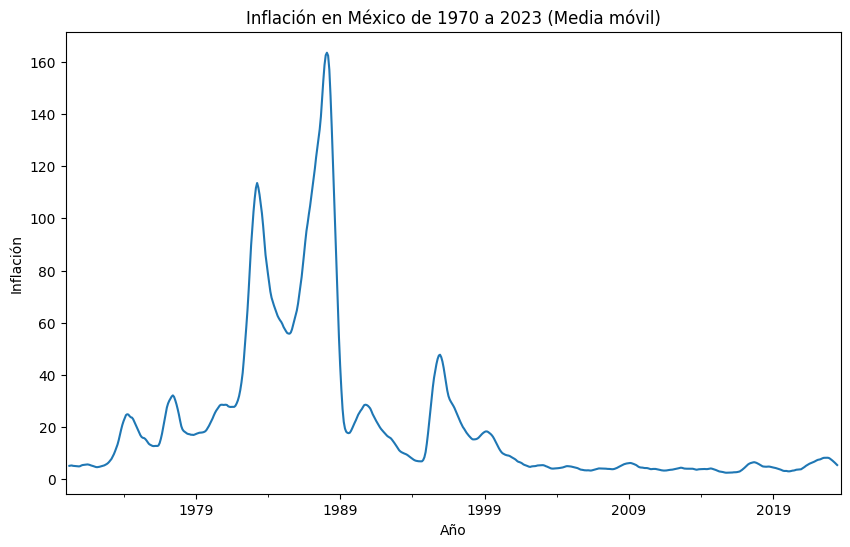

In [13]:
# Media móvil centrada a 7 meses 

datos['PMC-7'] = datos['Inflación'].rolling(7,center=True).mean()

# Gráficamos la media móvil

datos['PMC-7'].plot()
plt.title('Inflación en México de 1970 a 2023 (Media móvil)')
plt.ylabel('Inflación')
plt.xlabel('Año')
plt.show()

Observamos que el comportamiento de la gráfica de un promedio móvil centrado a 7 meses es muy similar a la gráfica de los datos originales. Vemos que mantiene los mismos picos causados por la crisis y que a partir de los años 2000 es cuando se mantiene con una tendencia constante.

### **6. Utiliza la descomposición estacional, para obtener el componente estacional, y la serie desestacionalizada.**

Vamos a obtener los componentes de la serie:
1. Tendencia-ciclo(trend)
2. Estacional (seasonal)
3. Irregular(resid)

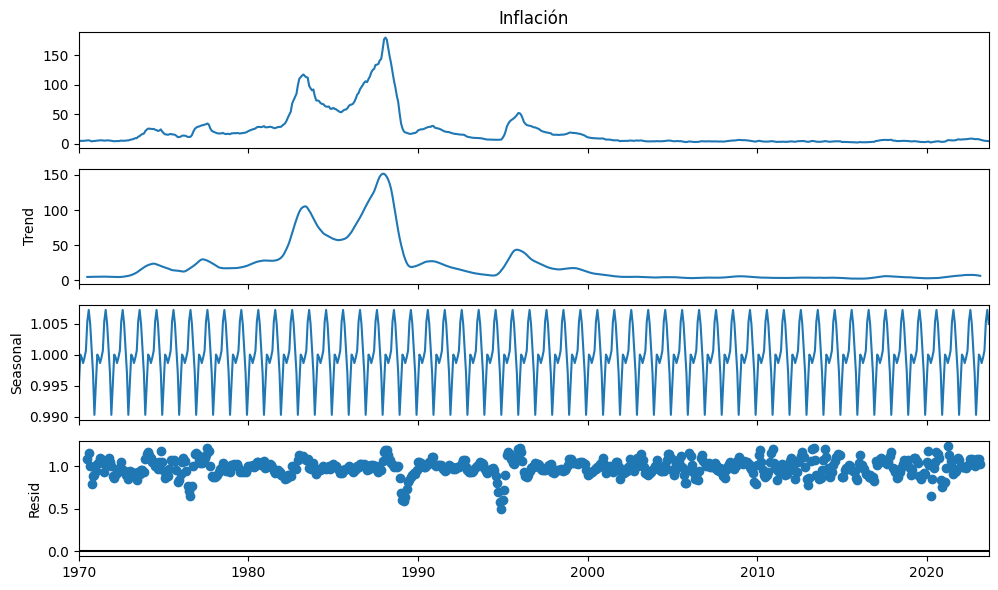

In [14]:
ets1 = seasonal_decompose(datos['Inflación'], model='mult')
ets1.plot();

In [15]:
# 1. Tendencia-ciclo (trend)
ets1.trend

Periodos
1970-01-01   NaN
1970-02-01   NaN
1970-03-01   NaN
1970-04-01   NaN
1970-05-01   NaN
              ..
2023-05-01   NaN
2023-06-01   NaN
2023-07-01   NaN
2023-08-01   NaN
2023-09-01   NaN
Freq: MS, Name: trend, Length: 645, dtype: float64

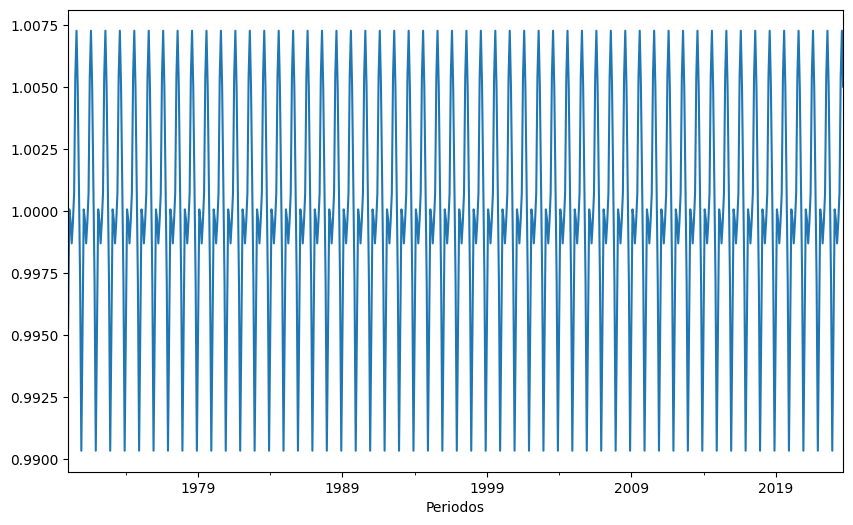

In [16]:
# 2. Componente estacional (seasonal)
ets1.seasonal.plot();

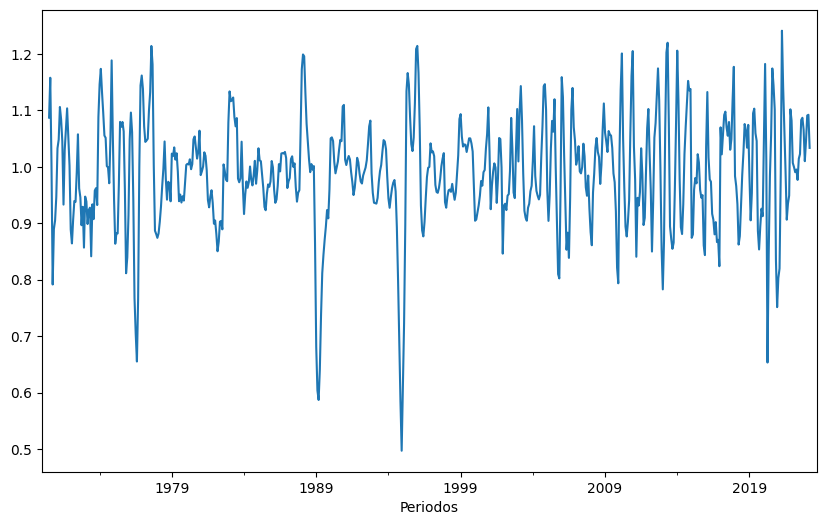

In [17]:
# 3. Componente irregular (resid)
ets1.resid.plot();

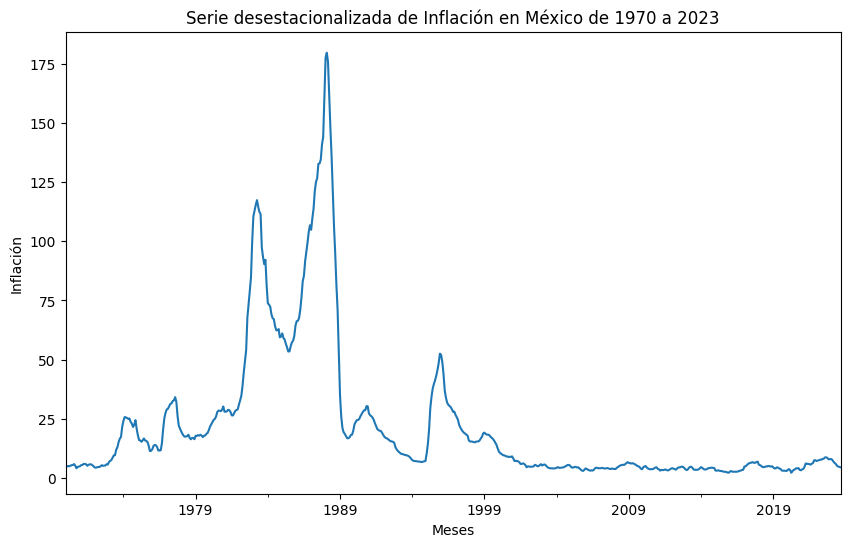

In [18]:
## Serie desestacionalizada
datos['desestacionalizada'] = datos['Inflación'] / ets1.seasonal
datos['desestacionalizada'].plot()
plt.title('Serie desestacionalizada de Inflación en México de 1970 a 2023')
plt.ylabel('Inflación')
plt.xlabel('Meses')
plt.show();

### **7. Utiliza la serie original para hacer el análisis ARIMA.**

Este punto se desarrollara más adelante, ya que para efectuar lo que se nos pide debemos de realizar los siguientes puntos que nos pide a continuación, debido a esto dejamos esta nota.

### **8. Realiza  una  prueba  de  raíz  unitaria  para  verificar  si  este  proceso  es estacionario (sino es estacionario conviértelo en estacionario).**

In [19]:
# Prueba de raíz unitaria
prueba_adf = adfuller(datos['Inflación'])
pvalue = prueba_adf[1]
pvalue.round(3)

0.045

$H_0:$ La serie no es estacionaria

$H_A:$ La serie es estacionaria

Rechazamos $H_0$ si $P-value<\alpha=0.05$

Rechazamos H0, significa que Inflación es una serie estacionaria.

* Inflación integrado I(0)

### **9. Con el proceso estacionario, realiza las gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF) y señala como se interpretan.**

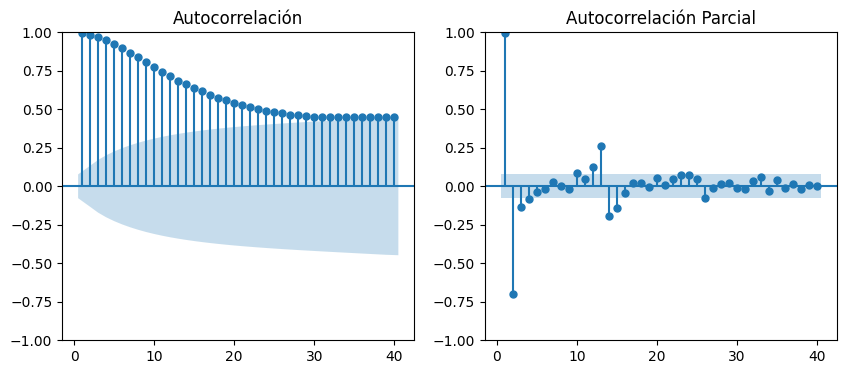

In [20]:
# Graficas de autocorrelación
ig, ax= plt.subplots(1,2, figsize=(10,4))

# 1ra subgrafica
plot_acf(datos['Inflación'].dropna(),zero=False, lags=40, ax= ax[0], title='Autocorrelación')

# 2da subgrafica
plot_pacf(datos['Inflación'].dropna(), zero= False, lags=40, ax= ax[1], title='Autocorrelación Parcial')

plt.show()

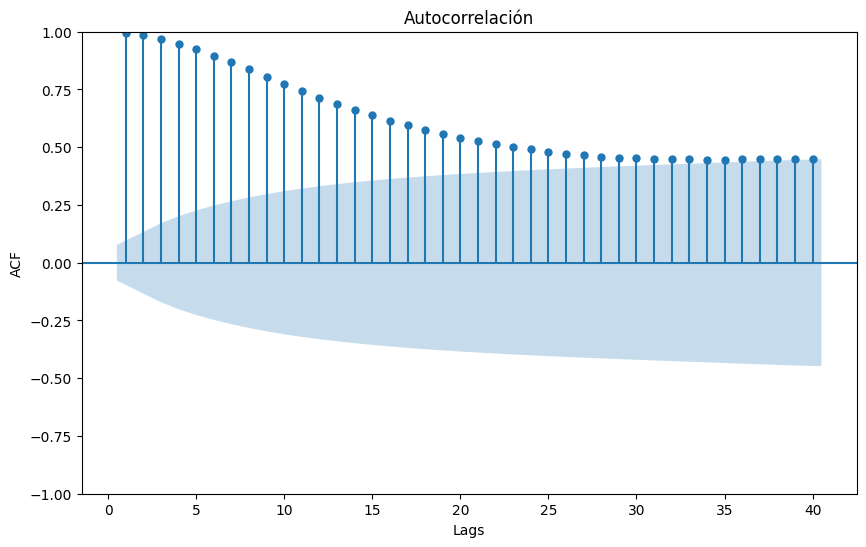

In [21]:
# 1ra subgráfica
plot_acf(datos['Inflación'].dropna(),zero=False, lags=40)
plt.title('Autocorrelación')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

Podemos observar en esta subgráfica todos los puntos sales, es decir que estos son componentes estacionarios, debido a que ninguno de ellos esta dentro de la área sombreada que es nuestro intervalo de confianza, a lo mucho llega a rozarlos.

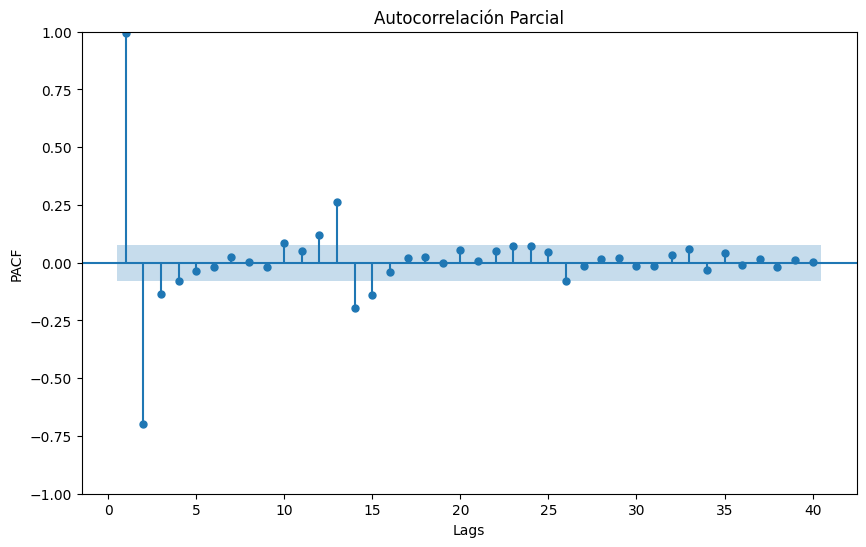

In [22]:
# 2da subgráfica
plot_pacf(datos['Inflación'].dropna(), zero= False, lags=40, title='Autocorrelación Parcial')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

Vemos que hay una correlación significativa en el lag 1, 2, 12, 13, 14, 15 y 26 con esto podemos llegar a la conclusión de que lo ocurrido que ocurra en un mes depende de lo que suceda en un mes del año anterior. Es decir que estos serían nuestros componentes estacionales.

### **10. Utilizando el código auto_arima y elige un criterio para seleccionar el modelo, ya sea el criterio de akaike (AIC) o el criterio bayesiano de información (BIC).**

In [23]:
## Utilizar auto_arima para AIC
arimaorder_aic = pm.auto_arima(datos['Inflación'],
              start_p = 1, start_q = 1,
              max_p = 7, max_q = 7,
              information_criterion = 'aic', 
              seasonal = True,
              m = 12,
              start_P = 1, start_Q = 1,
              max_P = 7, max_Q = 7)
print('Los parámetros del modelo AIC son:')
arimaorder_aic.params

Los parámetros del modelo AIC son:


<bound method ARIMA.params of ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 3, 12),
      suppress_warnings=True, with_intercept=False)>

In [24]:
## Utilizamos auto_arima para BIC
arimaorder_bic = pm.auto_arima(datos['Inflación'],
              start_p = 1, start_q = 1,
              max_p = 7, max_q = 7,
              information_criterion = 'bic', 
              seasonal = True,
              m = 12, 
              start_P = 1, start_Q = 1,
              max_P = 7, max_Q = 7)
print(' Los parámetros del modelo BIC son:')
arimaorder_bic.params

 Los parámetros del modelo BIC son:


<bound method ARIMA.params of ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)>

### **11. Estima el modelo ARIMA que hayas elegido e interpreta los coeficientes**

In [25]:
# Estimar modelo con los parámetros del modelo AIC
model = ARIMA(datos['Inflación'],
              order = (1,1,0),
              seasonal_order=(1,0,3,12))
results = model.fit()
print(results.summary())

                                        SARIMAX Results                                         
Dep. Variable:                                Inflación   No. Observations:                  645
Model:             ARIMA(1, 1, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood               -1138.474
Date:                                  Mon, 13 Nov 2023   AIC                           2288.949
Time:                                          19:10:26   BIC                           2315.755
Sample:                                      01-01-1970   HQIC                          2299.351
                                           - 09-01-2023                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8410      0.009     90.840      0.000       0.823

A través de los coeficientes podemos ver que nuestro modelo es un ARMA(2,3)

$$Y_t= 0.841Y_{t-1}-0.7781Y_{t-2}+0.0118\epsilon_{t-1}-0.5525\epsilon_{t-2}-0.1319\epsilon_{t-3}+\epsilon_t$$

### **12.Utiliza el modelo estimado para hacer pronósticos, y pronóstica uno, dos, tres, cuatro y cinco periodos. Recuerda que el pronóstico tiene que estar en la escala de la variable original.**

In [26]:
datos.tail(1)

,Inflación,PMC-7,desestacionalizada
Periodos,,,
2023-09-01,4.45,NaN,4.427818


In [27]:
# Pronóstico a 5 meses con los intervalos de confianza
forecast = results.get_forecast(steps = 5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
valores_pronostico = forecast_mean['2023-10-01':'2024-02-01']
intervalos = forecast_ci.loc['2023-10-01':'2024-02-01']
df_pronóstico = pd.DataFrame({'Pronóstico': valores_pronostico.round(3),
                               'Límite inferior': intervalos.iloc[:,0].round(3),
                               'Límite superior': intervalos.iloc[:,1].round(3)})
df_pronóstico.index.name = 'Periodos'

# Impirmimos el pronostico
df_pronóstico

,Pronóstico,Límite inferior,Límite superior
Periodos,,,
2023-10-01,4.507,1.750,7.263
2023-11-01,4.566,-1.209,10.342
2023-12-01,4.597,-4.498,13.691
2024-01-01,4.545,-8.016,17.106
2024-02-01,4.534,-11.548,20.616
